# Web Scraping
Web Scraping es el proceso de recopilar información de forma automática de la Web.

Se enfoca en la transformación de datos sin estructura en la web (como el formato HTML) en datos estructurados que pueden ser almacenados y analizados en una base de datos central, en una hoja de cálculo o en alguna otra fuente de almacenamiento.

A continuación, se detallará los pasos realizados para la extracción del contenido principal de una página web de interés personal.


## 1 - Importamos Librerias Necesarias


In [ ]:
# Importamos Librerias Necesarias
import requests
from bs4 import BeautifulSoup
from collections import Counter
import random
from wordcloud import WordCloud
import numpy as np
from PIL import Image
import nltk
from nltk.corpus import stopwords
import re
import matplotlib.pyplot as plt
from google.colab import files

## 2 - Conocemos como esta estructurada la página

In [ ]:
# Guardamos en una variable la url elegida
pagina = "https://vandal.elespanol.com/retro/retro-castlevania-symphony-of-the-night"

In [ ]:
# Guardamos el contenido de la pagina en una nueva variable y la mostramos
contenido = requests.get(pagina).text
print(contenido)

<!DOCTYPE html><html lang="es"><head>
<!--[if lt IE 9]>
<script src="https://www.vandalimg.com/rim/html5shiv.min.js"></script>
<![endif]-->
<meta name="viewport" content="width=device-width,initial-scale=1.0,minimum-scale=1.0">
<link rel="preload" as="script" href="https://www.vandalimg.com/krogan/funciones_krogan40.js">
<link rel="preconnect" href="https://www.vandalimg.com">
<link rel="preconnect" href="https://media.vandal.net">
<link rel="preconnect" href="https://sb.scorecardresearch.com">
<meta http-equiv="pragma" content="no-cache" />
<meta name="distribution" content="global" /><meta http-equiv="content-language" content="es-es" /><meta property="fb:pages" content="19836639906" /><meta property="fb:app_id" content="112581395442165" /><link rel="apple-touch-icon" sizes="57x57" href="https://www.vandalimg.com/apple-touch-icon-57x57.png">
<link rel="apple-touch-icon" sizes="60x60" href="https://www.vandalimg.com/apple-touch-icon-60x60.png">
<link rel="apple-touch-icon" sizes="72x7

## 3 - Accedemos a los elementos almacenados en etiquetas HTML

In [ ]:
# Parseamos el contenido con BeautifulSoup
bsoup = BeautifulSoup(contenido, "html.parser")

In [ ]:
# Guardamos en una variable el titulo principal de la pagina y lo mostramos
h1 = bsoup.find("h1").text
print("Titulo del contenido de la pagina: ",h1)

Titulo del contenido de la pagina:  Castlevania Symphony of the Night


In [ ]:
# Guardamos en diferentes variables las correspondientes divisiones de la url para poder mostrar el contenido principal de la pagina
div1 = bsoup.find("div",{"id": "globalwrap"})
div2 = div1.find("div",{"class": "fblanco mt1 froboto"})
div3 = div2.find("article",{"class": "articulo container"})
div4 = div3.find("div",{"class": "row mt15"})
div5 = div4.find("div",{"class": "span8"})
parrafos = div5.find_all("p")
print("Contenido principal de la pagina:")
for parrafo in parrafos:
  print("\n"+parrafo.text.strip())



Contenido principal de la pagina:

Castlevania es una de las más longevas y exitosas sagas que han pasado por los disquetes, cintas, cartuchos, CD, DVD, formato de descarga y Blu-ray, demostrando que es una saga que no solo ha sobrevivido en el tiempo, si no que su éxito siempre ha estado ligado a su calidad. Castlevania es una saga que nació como un juego de plataformas en 2D, pero que al estar ligado a el sello de Konami, este ha sido bien conocido a lo largo de su historia por dejar que algunos de sus talentos crear su propia versión de la serie.

Muestra de ello la tenemos con MercurySteam, que reinició la saga en colaboración con Kojima, demostrando una vez más que Konami ha dejado en manos de personas y estudios diferentes, para que cada uno de ellos, como fans y entusiastas de Castlevania, aporten sus ideas y su visión de la lucha contra Dracula.

Por ello, el juego de hoy no es el primer Castlevania, pero sí uno que cambió la saga, que demostró que aparte de recorrer pantallas 

## 4 - Analisis de Frecuencias del texto extraido

In [ ]:
# Mostramos la cantidad de veces que se repite una determinada palabra
conteo_palabras = str(parrafos)
print("Cantidad de veces que se repite la palabra 'Dracula': ",conteo_palabras.count("Dracula"),"Veces")
print("Cantidad de veces que se repite la palabra 'Castlevania': ",conteo_palabras.count("Castlevania"),"Veces")
print("Cantidad de veces que se repite la palabra 'Belmont': ",conteo_palabras.count("Belmont"),"Veces")
print("Cantidad de veces que se repite la palabra 'Richter': ",conteo_palabras.count("Richter"),"Veces")

Cantidad de veces que se repite la palabra 'Dracula':  14 Veces
Cantidad de veces que se repite la palabra 'Castlevania':  18 Veces
Cantidad de veces que se repite la palabra 'Belmont':  2 Veces
Cantidad de veces que se repite la palabra 'Richter':  7 Veces


In [ ]:
#Funcion para buscar palabras
def buscar_palabra(palabra):
  conteo = str(parrafos).lower().count(palabra.lower())
  print(f"La palabra {palabra} se repite {conteo} veces")
palabra_a_buscar = input("Ingrese la palabra a buscar: ")
buscar_palabra(palabra_a_buscar)

# Creamos un bucle para que el usuario juegue buscando la cantidad de palabras que se repiten del contenido principal
while True:
  respuesta = input("¿Desea buscar otra palabra? (s/n): ").lower()
  if respuesta.lower() == "s"  :
    palabra_a_buscar = input("Ingrese la palabra a buscar: ")
    buscar_palabra(palabra_a_buscar)
  elif respuesta.lower() != "n" and respuesta.lower() != "s":
    print("Opcion incorrecta")
  else:
    print("Gracias por usar el programa")
    break


Ingrese la palabra a buscar: Konami
La palabra Konami se repite 3 veces
¿Desea buscar otra palabra? (s/n): s
Ingrese la palabra a buscar: Alucard
La palabra Alucard se repite 4 veces
¿Desea buscar otra palabra? (s/n): e
Opcion incorrecta
¿Desea buscar otra palabra? (s/n): 2
Opcion incorrecta
¿Desea buscar otra palabra? (s/n): n
Gracias por usar el programa


In [ ]:
# Generamos un Parrafo aleatorio y lo mostramos
parrafo_aleatorio = random.choice(parrafos).text.strip()
print(parrafo_aleatorio)
# imprime la longitud del parrafo aleatoria
print("Longitud del Parrafo: ",len(parrafo_aleatorio.split()))

Pero Castlevania siguió a lo suyo, dotando a sus juegos de una atmósfera única, y con una jugabilidad exquisita y profunda historia. En esta serie, el protagonista pertenece a un clan cuyo destino es erradicar el mal en la tierra, y lo hacía con armas que se alejaban de la típica espada, puesto que el enemigo a batir era el mismísimo Dracula.
Longitud del Parrafo:  62


## 5 - Preparamos el texto para graficar una nube de palabras

In [ ]:
# Descarga corpus de stopwords en español
nltk.download("stopwords")
stopwords_es = set(stopwords.words("spanish"))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Funcion Para limpiar texto
def limpiar_texto(texto):
  #Convierte texto en minuscula
  texto_minuscula = texto.lower()
  texto_sin_puntuacion = re.sub(r"[^\w\s]", "", texto_minuscula) # Elimina todos los signos de puntuacion
  lista_palabras = texto_sin_puntuacion.split() # Divide el texto en palabras individuales
  palabras_importantes = [] # Crea una lista de palabras importantes
  for palabra in lista_palabras:
    if palabra not in stopwords_es:
      palabras_importantes.append(palabra)
  return palabras_importantes

texto_completo = bsoup.get_text()
palabras_limpias = limpiar_texto(texto_completo)

texto_limpio = " ".join(palabras_limpias)


## 6 - Graficamos una nube de palabras

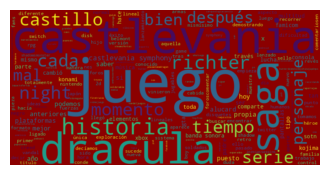

In [ ]:
# Graficamos las palabras mas destacadas
wordcloud = WordCloud(width=800, height=400, background_color="darkred", colormap = "viridis").generate(texto_limpio)
plt.figure(figsize=(4, 4))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## 7 - Optimizamos el Grafico

In [ ]:
# Funcion Para limpiar texto
def limpiar_texto(texto):

# Lista de palabras a eliminar

  palabras_a_eliminar = ['parte', 'mal', 'después', 'si', 'cada', 'saga', 'momento',
        'hoy', 'parte', 'propia', 'toda', 'hoy', 'tan', 'mismo',
        'sello', 'aquella', 'hace', 'parte','vandal', 'ello']
# Anexa las palabras que quiero eliminar a las stopwords
  todas_las_palabras_a_eliminar = stopwords_es.union(palabras_a_eliminar)


  #Convierte texto en minuscula
  texto_minuscula = texto.lower()
  texto_sin_puntuacion = re.sub(r"[^\w\s]", "", texto_minuscula) # Elimina todos los signos de puntuacion
  lista_palabras = texto_sin_puntuacion.split() # Divide el texto en palabras individuales
  palabras_importantes = [] # Crea una lista de palabras impoirtantes
  for palabra in lista_palabras:
    if palabra not in todas_las_palabras_a_eliminar:
      palabras_importantes.append(palabra)
  return palabras_importantes

texto_completo = bsoup.get_text()
palabras_limpias = limpiar_texto(texto_completo)

texto_limpio = " ".join(palabras_limpias)


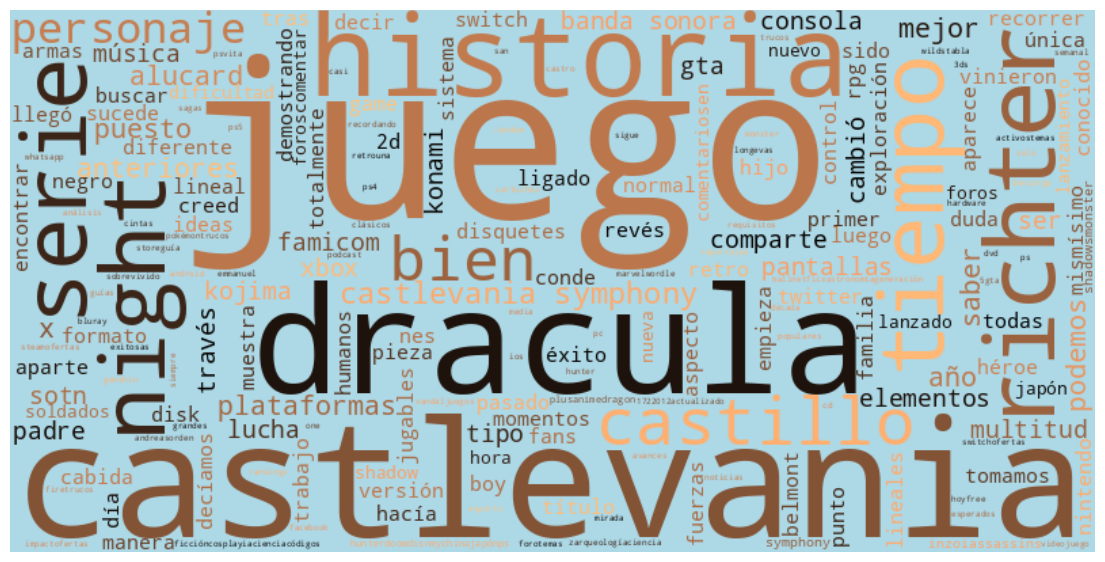

In [ ]:
# Mostramos las palabras mas destacadas, suprimiendo irrelevantes
wordcloud = WordCloud(width=800, height=400, background_color="lightblue", colormap = "copper").generate(texto_limpio)

plt.figure(figsize=(14, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
# Script para descargar la imagen
wordcloud.to_file("Imagen.jpg") # Guarda la imagen generada con el nombre
files.download("Imagen.jpg") # Descarga la imagen


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Este método de visualización muestra la frecuencia con la que aparece una palabra en el cuerpo de texto dado, haciendo que el tamaño de cada palabra sea proporcional a su frecuencia.

Analizando la imagen podemos hacernos la idea de que el contenido principal de la página trata de un juego llamado Castlevania con historia centrado en dos personajes principales: Drácula y Richter